In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [24]:
# Cargar datos con formato de fecha correcto
df = pd.read_csv('samsung.csv', parse_dates=['Date'], dayfirst=True)

In [25]:
# Crear características para clustering
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [26]:
# Variables para clustering (precio y volumen)
X = df[['Close', 'Volume']].copy()


In [27]:
# Normalizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

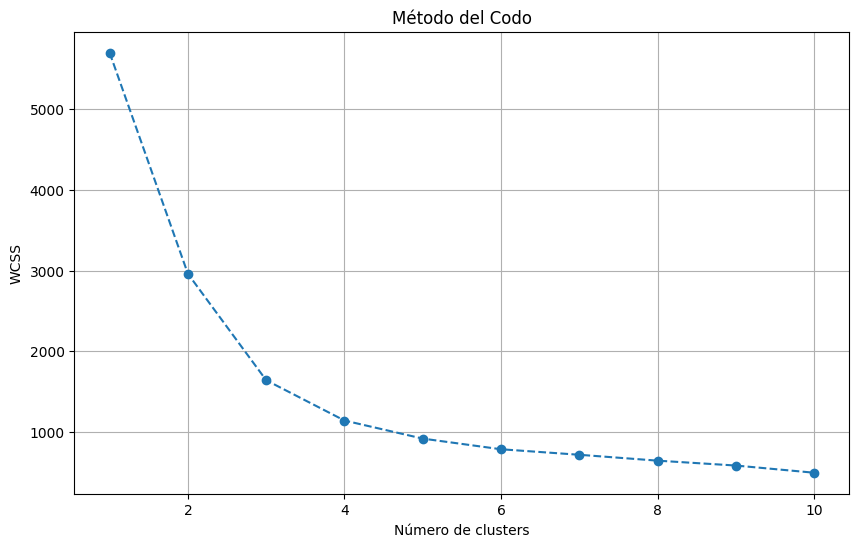

In [28]:
# Método del codo para determinar número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [29]:
# Seleccionar número de clusters (basado en el gráfico)
n_clusters = 3  # Ajustar según donde esté el "codo"

In [30]:
# Aplicar K-Means
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)


In [31]:
# Añadir clusters al dataframe original
df['Cluster'] = clusters

In [33]:
# Calcular métrica de silueta
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Puntaje de Silueta: {silhouette_avg:.3f}")

Puntaje de Silueta: 0.501


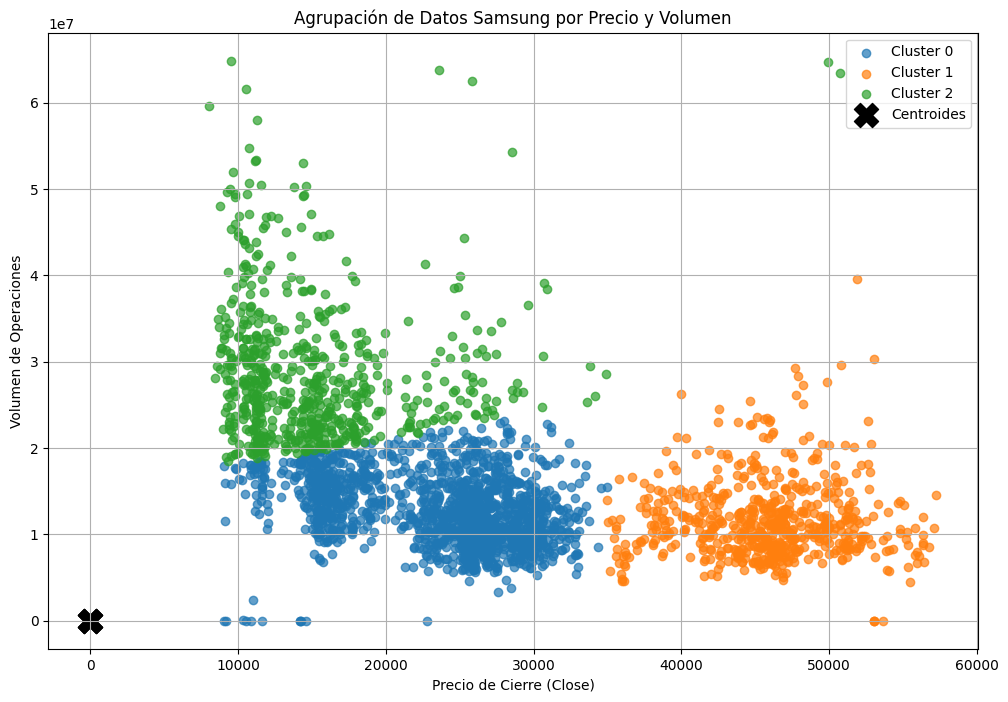

In [34]:
# Visualización de clusters
plt.figure(figsize=(12, 8))
for cluster in range(n_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    plt.scatter(cluster_data['Close'], cluster_data['Volume'], 
                label=f'Cluster {cluster}', alpha=0.7)

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='black', marker='X', label='Centroides')
plt.title('Agrupación de Datos Samsung por Precio y Volumen')
plt.xlabel('Precio de Cierre (Close)')
plt.ylabel('Volumen de Operaciones')
plt.legend()
plt.grid()
plt.show()

In [35]:

# Análisis de clusters por año
cluster_year = pd.crosstab(df['Year'], df['Cluster'], normalize='index')
print("\nDistribución de clusters por año:")
print(cluster_year)


Distribución de clusters por año:
Cluster         0         1         2
Year                                 
2008     0.198444  0.000000  0.801556
2009     0.292490  0.000000  0.707510
2010     0.737052  0.000000  0.262948
2011     0.608871  0.000000  0.391129
2012     0.854839  0.000000  0.145161
2013     0.947368  0.000000  0.052632
2014     0.959184  0.000000  0.040816
2015     0.959839  0.000000  0.040161
2016     0.878049  0.073171  0.048780
2017     0.000000  1.000000  0.000000
2018     0.000000  0.991803  0.008197
2019     0.000000  1.000000  0.000000


<Figure size 1200x600 with 0 Axes>

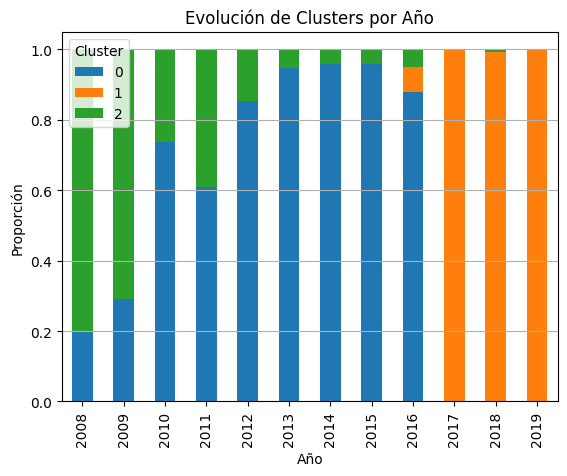

In [36]:
# Gráfico de evolución de clusters por año
plt.figure(figsize=(12, 6))
cluster_year.plot(kind='bar', stacked=True)
plt.title('Evolución de Clusters por Año')
plt.xlabel('Año')
plt.ylabel('Proporción')
plt.legend(title='Cluster')
plt.grid(axis='y')
plt.show()

In [37]:
# Características promedio por cluster
print("\nCaracterísticas promedio por cluster:")
print(df.groupby('Cluster')[['Close', 'Volume']].mean())


Características promedio por cluster:
                Close        Volume
Cluster                            
0        23695.510332  1.278258e+07
1        45833.344051  1.164983e+07
2        15043.026941  2.890558e+07
